# Ridge Reg.

In [4]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV


In [51]:
df = pd.read_csv("Hitters.csv")
df

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


In [54]:
df = df.dropna()
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
y = df["Salary"]
X_ = df.drop(["Salary","League","Division","NewLeague"],axis = 1).astype("float64")
X = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0


In [55]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 42)

In [56]:
ridge_model = Ridge(alpha = 0.1).fit(X_train,y_train)

In [57]:
lambdalar = 10**np.linspace(10,-2,100)*0.5

In [58]:
ridge_model = Ridge()
katsayilar = []

for i in lambdalar:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X_train,y_train)
    katsayilar.append(ridge_model.coef_)

In [32]:
katsayilar

[array([ 1.07914067e-03,  3.57350162e-04,  5.48159206e-05,  1.91408819e-04,
         1.95263429e-04,  1.58316937e-04,  2.76173327e-05,  1.77674924e-02,
         5.24599637e-03,  6.29069328e-04,  2.76545431e-03,  2.68607568e-03,
         1.94284669e-03,  1.86058089e-03,  1.52918709e-04,  2.95763109e-06,
         7.28352025e-03,  2.38237053e-07, -1.50698838e-06,  3.28678482e-07]),
 array([ 1.40337807e-03,  4.65376276e-04,  7.11448217e-05,  2.49832373e-04,
         2.53344130e-04,  2.05763880e-04,  3.38499286e-05,  2.20568877e-02,
         6.52738228e-03,  7.89187032e-04,  3.44989116e-03,  3.35644378e-03,
         2.42161636e-03,  2.43727563e-03,  1.98515693e-04,  4.02040641e-06,
         9.45931023e-03,  3.03889328e-07, -1.98799273e-06,  4.18751733e-07]),
 array([ 1.81925932e-03,  6.04307167e-04,  9.20111196e-05,  3.25281835e-04,
         3.27514446e-04,  2.66558162e-04,  4.06948891e-05,  2.69748679e-02,
         8.00688318e-03,  9.78486804e-04,  4.24629329e-03,  4.14022543e-03,
        

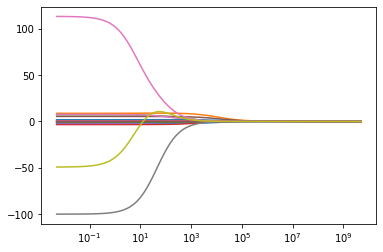

In [59]:
ax = plt.gca()
ax.plot(lambdalar,katsayilar)
ax.set_xscale("log")

# Tahmin

In [68]:
ridge_model = Ridge(alpha = 0.7599)
ridge_model.fit(X_train,y_train)
y_pred = ridge_model.predict(X_train)
y_pred[:10]

array([ 376.54134075,  803.14025842,  496.03787883,  112.67274002,
        427.28524209, 1003.76801657,  153.76669592,  361.63389623,
        483.78249768,  917.321894  ])

In [61]:
rmse = np.sqrt(mean_squared_error(y_train,y_pred))

In [69]:
rmse

289.3292830531484

In [70]:
from sklearn.model_selection import cross_val_score
np.sqrt(np.mean(-cross_val_score(ridge_model,X_train,y_train,cv = 10,scoring = "neg_mean_squared_error")))

351.479987314025

# Tuning

In [64]:
lambdalar = 10**np.linspace(10,-2,100)*0.5

In [65]:
ridgecv = RidgeCV(alphas = lambdalar,scoring="neg_mean_squared_error",cv=10,normalize=True)

In [66]:
ridgecv.fit(X_train,y_train)

C:\Users\ardaa_iyfsapc\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=True,
        scoring='neg_mean_squared_error', store_cv_values=False)

In [67]:
ridgecv.alpha_

0.7599555414764666